# Pytorch workflow

* Ground truth notebook

In [2]:
what_were_covering = {1 : 'data (prepare and load)',
                                               2: 'build model',
                                               3: 'fitting the model to data (training)',
                                               4: 'make predictions and evaluate model',
                                               5: 'save and load the model',
                                               6: 'putting things together'}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'make predictions and evaluate model',
 5: 'save and load the model',
 6: 'putting things together'}

In [12]:
import torch
from torch import nn #nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check Pytorch version
torch.__version__

'1.12.1+cu113'

## 1. Data (preparing and loading)

Data can be almost anything.. in ML.

* Excel speasheets
* Images of any kind
* Videos
* Audio
* DNA
* Text

ML is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some linear regression model. We'll use a linear regression formula to make a straight line with known parameters

In [6]:
# Create *known* parameters

weight = 0.7 
bias = 0.3

# Create 
start = 0 
end =  1
step  =  0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y  = weight* X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into train & test sets 

In [7]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

"Visualize, visualize, visualize" -> motto comes in!

In [13]:
def plot_predictions(train_data =  X_train, 
                                         train_labels = y_train,
                                         test_data = X_test,
                                         test_labels = y_test,
                                         predictions = None):
  '''
  Plots training data, test data and compares predictions
  '''
  plt.figure(figsize = (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', s= 4, label = "training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c= 'g', label = 'Testing data')

  # Are there predictions?
  if predictions is not None:
          plt.scatter(test_data, predictions, c= 'r', s = 4, label = 'predictions')
  
  plt.legend(prop= {'size': 14});

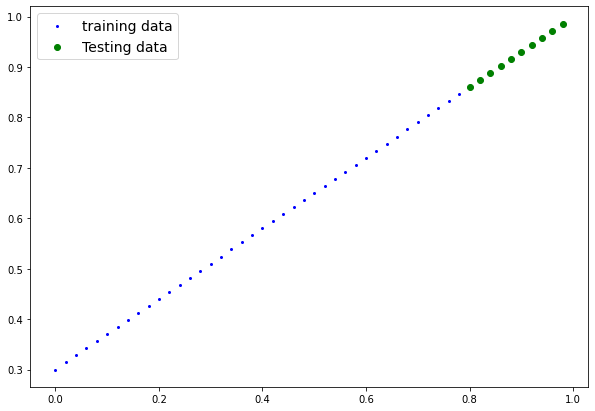

In [16]:
plot_predictions()

## 2. Build model

Our first Pytorch model!

Very interesting... let's do it!

What out model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values.

--> With Gradient descent + Back Propagation.

In [22]:
from torch import nn
# Create linear regresison model class

class LinearRegressionModel(nn.Module): # <- subclass nn.Module
          def __init__(self):
              super().__init__()
              self.weights = nn.Parameter(torch.randn(1,
                                                                                              requires_grad = True,
                                                                                              dtype =  torch.float ))
              self.bias = nn.Parameter(torch.randn(1, 
                                                                                      requires_grad = True,
                                                                                      dtype = torch.float))
              
          # Forward() method to define the computation in the model (ANY SUBCLASS OF NN requires forward)
          def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
              return self.weights * x + self.bias  # regression model.

### Pytorch model building essentials:

* torch.nn  - contains all of the buildings for computational graphs (a NN considered as computational graph).
* torch.nn.Parameter - what parameters should our model learn
* torch.nn.Module - the base Class 
* torch.optim - optimizer
* def forward() - All nn.Module subclasses require you to overwrite what happens 

### Checking the contents of our Pytorch model



In [18]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check out our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.


In [21]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [24]:
# Make predictions with model

with torch.inference_mode():
      y_preds = model_0(X_test)

with torch.no_grad():
      y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [27]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [25]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

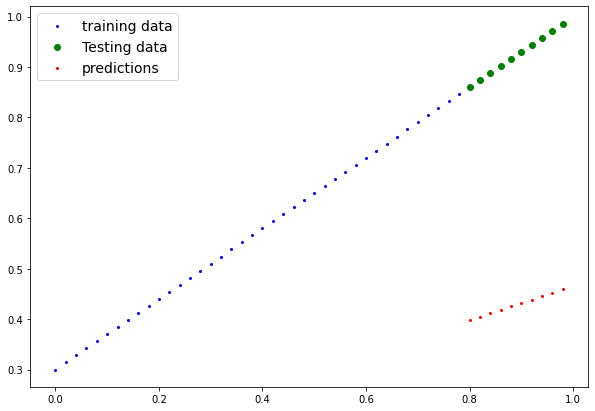

In [26]:
plot_predictions(predictions = y_preds)

## 3. Train model

The whole idea: move from unknown parameters  --> known parameters.

* Loss function ~ Cost function.

* **Lost function:** measures how wrong your model's prediction is to the target.

* **Optimizer:** takes into account the loss and adjust the model's parameters

Specifically we need
* A training loop
* A testing loop

In [28]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [30]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                                                         lr = 0.01  ) # learning rate

### Building a training loop (and testing) in Pytorch